<a href="https://colab.research.google.com/github/katafuchix/at_it_stock_python/blob/main/Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyti
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install
!pip install Ta-Lib

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [ ]:
# 株価の取得とボリンジャーバンドの計算
from pyti.bollinger_bands import upper_bollinger_band as bb_up
from pyti.bollinger_bands import middle_bollinger_band as bb_mid
from pyti.bollinger_bands import lower_bollinger_band as bb_low

df = get_stock_data(5401)
data = df['Close'].tolist()
period = 25
bb_up, bb_mid, bb_low = bb_up(data, period), bb_mid(data, period), bb_low(data, period) 
df['bb_up'], df['bb_mid'], df['bb_low']  = bb_up, bb_mid, bb_low


# オシレーターと移動平均の計算
import talib as ta

close = df['Close']
macd, macdsignal, _ = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'], df['macd_signal'] = macd, macdsignal

rsi14, rsi28 = ta.RSI(close, timeperiod=14), ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

ma5, ma25, ma75  = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25), ta.SMA(close, timeperiod=75)
df['ma5'], df['ma25'], df['ma75'] = ma5, ma25, ma75


# ゴールデンクロスとデッドクロスの算出
import numpy as np

ma5, ma25 = df['ma5'], df['ma25']
cross  = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc  = (cross != cross_shift) & (cross == False)

gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]
df["gc"], df["dc"] = gc, dc


import numpy as np

ma5, ma25 = df['ma5'], df['ma25']
cross  = ma5 > ma25

cross_shift = cross.shift(1)
temp_gc = (cross != cross_shift) & (cross == True)
temp_dc  = (cross != cross_shift) & (cross == False)

gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]
df["gc"], df["dc"] = gc, dc


In [ ]:
# 確認
import plotly.graph_objs as go

pdf = df.tail(120)

layout = {
            'title'  : { 'text': "5401", 'x':0.5 }, 
            'xaxis' : { 'title': "日付", 'rangeslider': { 'visible': False } },
            'yaxis' : { 'title': "価格（円）", 'tickformat': ',' },
            'plot_bgcolor':'light blue'
          }

data =  [
    go.Candlestick(name="chart", x = pdf.index, open=pdf['Open'], high=pdf['High'], low=pdf['Low'], close=pdf['Close'], 
                   increasing_line_color= '#00ada9', decreasing_line_color= '#a0a0a0'), 
    go.Scatter(x=pdf.index, y=pdf["ma5"], name='MA5', line=dict(color="#ff007f" ,width=1.2)),
    go.Scatter(x=pdf.index, y=pdf["ma25"], name='MA25', line=dict(color='#7fbfff' ,width=1.2)), 
    go.Scatter(x=pdf.index, y=pdf["gc"], name="Golden Cross", mode='markers', marker=dict(size = 12, color='blueviolet')),
    go.Scatter(x=pdf.index, y=pdf["dc"], name="Dead Cross", mode='markers', marker=dict(size = 12, color='black', symbol = 'x'))   
]

fig = go.Figure(data = data, layout = go.Layout(layout))
fig.show()

In [ ]:
import plotly.graph_objs as go

pdf = df.tail(120)

layout = {
            'title'  : { 'text': "5401", 'x':0.5 }, 
            'xaxis' : { 'title': "日付", 'rangeslider': { 'visible': False } },
            'yaxis' : { 'title': "価格（円）", 'tickformat': ',' },
            'plot_bgcolor':'light blue'
          }

data =  [
    go.Candlestick(name="chart", x = pdf.index, open=pdf['Open'], high=pdf['High'], low=pdf['Low'], close=pdf['Close'], 
                   increasing_line_color= '#00ada9', decreasing_line_color= '#a0a0a0'), 
    go.Scatter(x=pdf.index, y=pdf["ma5"], name='MA5', line=dict(color="#ff007f" ,width=1.2)),
    go.Scatter(x=pdf.index, y=pdf["ma25"], name='MA25', line=dict(color='#7fbfff' ,width=1.2)), 
    go.Scatter(x=pdf.index, y=pdf["gc"], name="Golden Cross", mode='markers', marker=dict(size = 12, color='blueviolet')),
    go.Scatter(x=pdf.index, y=pdf["dc"], name="Dead Cross", mode='markers', marker=dict(size = 12, color='black', symbol = 'x')),   
    go.Scatter(x=pdf.index ,y=pdf["bb_up"], name= '',line=dict(color='lavender' ,width=0)),
    go.Scatter(x=pdf.index ,y=pdf["bb_low"], name= 'BB',line=dict(color='lavender' ,width=0), fill='tonexty', fillcolor="rgba(170,170,170,0.25)"),
]

fig = go.Figure(data = data, layout = go.Layout(layout))
fig.show()

In [ ]:
import plotly.graph_objs as go

pdf = df.tail(120)
pdf.reset_index(inplace=True)

layout = {
            'title'  : { 'text': "5401", 'x':0.5 }, 
            'xaxis' : { 'title': "日付", 'rangeslider': { 'visible': False } },
            'yaxis' : { 'title': "価格（円）", 'tickformat': ',' },
            'plot_bgcolor':'light blue'
          }

data =  [
    # ローソク足
    go.Candlestick(name="chart", x = pdf.index, open=pdf['Open'], high=pdf['High'], low=pdf['Low'], close=pdf['Close'], 
                   increasing_line_color= '#00ada9', decreasing_line_color= '#a0a0a0'), 
    # 5日移動平均線
    go.Scatter(x=pdf.index, y=pdf["ma5"], name='MA5', line=dict(color="#ff007f" ,width=1.2)),
    # 25日移動平均線
    go.Scatter(x=pdf.index, y=pdf["ma25"], name='MA25', line=dict(color='#7fbfff' ,width=1.2)), 
    # ゴールデンクロス
    go.Scatter(x=pdf.index, y=pdf["gc"], name="Golden Cross", mode='markers', marker=dict(size = 12, color='blueviolet')),
    # デッドクロス
    go.Scatter(x=pdf.index, y=pdf["dc"], name="Dead Cross", mode='markers', marker=dict(size = 12, color='black', symbol = 'x')),
    # ボリンジャーバンド上限
    go.Scatter(x=pdf.index ,y=pdf["bb_up"], name= '',line=dict(width=0)),
    # ボリンジャーバンド下限
    go.Scatter(x=pdf.index ,y=pdf["bb_low"], name= 'BB',line=dict(width=0), fill='tonexty', fillcolor="rgba(170,170,170,0.25)"),
]
fig = go.Figure(data = data, layout = go.Layout(layout))

# 3日に1日の日付を取り出す
days_list = [pdf.index[idx:idx + 3] for idx in range(0,len(pdf.index), 3)]
dates = [pdf['Date'][r[0]] for r in days_list]

# X軸を更新
fig['layout'].update({
    'xaxis':{
        'showgrid': True,
        'tickvals': np.arange(0, pdf.index[-1],3),
        'ticktext': [x.strftime('%m/%d') for x in dates],
        }
})

fig.show()

In [ ]:
import plotly.graph_objs as go

pdf = df.tail(120)
pdf.reset_index(inplace=True)

layout = { 
            'title'  : { 'text': "5401", 'x':0.5 }, 
            'xaxis' : { 'title': "日付", 'rangeslider': { 'visible': False } },
            'yaxis1' : { 'domain': [0.35, 1], 'title': "価格（円）", 'tickformat': ',' },
            'yaxis2' : { 'domain': [0.2, 0.35] },
            'yaxis3' : { 'domain': [0.0, 0.2], 'title': "Volume", 'side':"right"},
            'plot_bgcolor':'light blue'
          }

data =  [
    # ローソク足
    go.Candlestick(yaxis="y1", name="chart", x = pdf.index, open=pdf['Open'], high=pdf['High'], low=pdf['Low'], close=pdf['Close'], 
                   increasing_line_color= '#00ada9', decreasing_line_color= '#a0a0a0'), 
    # 5日移動平均線
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["ma5"], name='MA5', line=dict(color="#ff007f" ,width=1.2)),
    # 25日移動平均線
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["ma25"], name='MA25', line=dict(color='#7fbfff' ,width=1.2)), 
    # ゴールデンクロス
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["gc"], name="Golden Cross", mode='markers', marker=dict(size = 12, color='blueviolet')),
    # デッドクロス
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["dc"], name="Dead Cross", mode='markers', marker=dict(size = 12, color='black', symbol = 'x')),
    # ボリンジャーバンド上限
    go.Scatter(x=pdf.index ,y=pdf["bb_up"], name= '',line=dict(color='lavender' ,width=0)),
    # ボリンジャーバンド下限
    go.Scatter(yaxis="y1", x=pdf.index ,y=pdf["bb_low"], name= 'BB',line=dict(color='lavender' ,width=0), fill='tonexty', fillcolor="rgba(170,170,170,0.25)"),
    # 出来高
    go.Bar(yaxis="y3" ,x=pdf.index, y=df['Volume'], name= 'Volume', marker=dict(color='slategray')) 
]

fig = go.Figure(data = data, layout = go.Layout(layout))

days_list = [pdf.index[idx:idx + 3] for idx in range(0,len(pdf.index), 3)]
dates = [pdf['Date'][r[0]] for r in days_list]

fig['layout'].update({
    'xaxis':{
        'showgrid': True,
        'tickvals': np.arange(0, pdf.index[-1],3),
        'ticktext': [x.strftime('%m/%d') for x in dates],
        }
})

fig.show()

In [ ]:
import plotly.graph_objs as go

pdf = df.tail(120)
pdf.reset_index(inplace=True)

layout = {  'height':1000, 
            'title'  : { 'text': "5401", 'x':0.5 }, 
            'xaxis' : { 'title': "日付", 'rangeslider': { 'visible': False } },
            'yaxis' : { 'domain': [0.40, 1],'title': "価格（円）" ,'side':"left", 'tickformat':',' },
            'yaxis2': {'domain': [0.30, 0.40], 'title': "", 'side':"right"},
            'yaxis3': {'domain': [0.20, 0.30], 'title': "RSI", 'side':"right"},
            'yaxis4': {'domain': [0.10, 0.20], 'title': "MACD", 'side':"right"}, 
            'yaxis5': {'domain': [0.0, 0.10], 'title': "Volume", 'side':"right"},
            'plot_bgcolor':'light blue'
          }

data =  [
    # ローソク足
    go.Candlestick(yaxis="y1", name="chart", x = pdf.index, open=pdf['Open'], high=pdf['High'], low=pdf['Low'], close=pdf['Close'], 
                   increasing_line_color= '#00ada9', decreasing_line_color= '#a0a0a0'), 
    # 5日移動平均線
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["ma5"], name='MA5', line=dict(color="#ff007f" ,width=1.2)),
    # 25日移動平均線
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["ma25"], name='MA25', line=dict(color='#7fbfff' ,width=1.2)), 
    # ゴールデンクロス
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["gc"], name="Golden Cross", mode='markers', marker=dict(size = 12, color='blueviolet')),
    # デッドクロス
    go.Scatter(yaxis="y1", x=pdf.index, y=pdf["dc"], name="Dead Cross", mode='markers', marker=dict(size = 12, color='black', symbol = 'x')),
    # ボリンジャーバンド上限
    go.Scatter(x=pdf.index ,y=pdf["bb_up"], name= '',line=dict(color='lavender' ,width=0)),
    # ボリンジャーバンド下限
    go.Scatter(yaxis="y1", x=pdf.index ,y=pdf["bb_low"], name= 'BB',line=dict(color='lavender' ,width=0), fill='tonexty', fillcolor="rgba(170,170,170,0.25)"),
    # 短期RSI
    go.Scatter(yaxis="y3" ,x=pdf.index ,y=pdf["rsi14"], name= 'RSI14',line=dict(color='purple' ,width=1)),
    # 長期RSI
    go.Scatter(yaxis="y3" ,x=pdf.index ,y=pdf["rsi28"], name= 'RSI28',line=dict(color='green' ,width=1)),
    # MACD
    go.Scatter(yaxis="y4" ,x=pdf.index ,y=pdf["macd"], name= 'macd',line=dict(color='purple' ,width=1)),
    # MACDシグナル
    go.Scatter(yaxis="y4" ,x=pdf.index ,y=pdf["macd_signal"], name= 'macd_signal',line=dict(color='green' ,width=1)),
    # 出来高
    go.Bar(yaxis="y5" ,x=pdf.index, y=df['Volume'], name= 'Volume', marker=dict(color='slategray')) 
]

fig = go.Figure(data = data, layout = go.Layout(layout))

days_list = [pdf.index[idx:idx + 3] for idx in range(0,len(pdf.index), 3)]
dates = [pdf['Date'][r[0]] for r in days_list]

fig['layout'].update({
    'xaxis':{
        'showgrid': True,
        'tickvals': np.arange(0, pdf.index[-1],3),
        'ticktext': [x.strftime('%m/%d') for x in dates],
        }
})

fig.show()

In [ ]:
!pip install prophet

In [ ]:
df = get_stock_data(5401)
df["ds"] = df.index
df = df.rename(columns={'Close': 'y'})

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


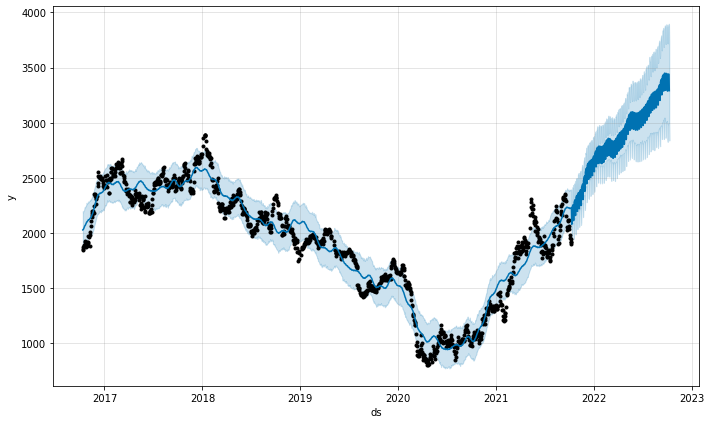

In [ ]:
from prophet import Prophet

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)